# - Term Frequency - Inverse Data Frequency (TF-IDF) : 


Tf-Idf bir kelimenin bir corpus veya doküman için ne kadar önemli olduğunu tespit edebilmek için hesaplanan bir istatistiktir.

Bir dokümanın sorgulanan kelimeler açısından ne kadar önemli olduğunu nasıl anlayabiliriz ? 

Bir kelime bir belgede çok sık geçiyorsa, o kelime sıklık değeri ile orantılı olarak önemli olmalı ve o kelimeye o derece yüksek bir skor mu vermeliyiz? 

Ancak bir kelime çok fazla kez başka belgede de görünüyorsa, muhtemelen bu kelime benzersiz bir tanımlayıcı değildir. Bu durumda kelimenin doküman açısından ne kadar belirleyici olduğu kelimenin sıklığı ile açıklanamaz.  

Bir doküman koleksiyonunda daha seyrek olarak kullanılan kelimeler daha bilgilendiricidir. Bu nedenle sık kullanılan kelimeler için o daha düşük puanlama yapmalıyız. Kısacası, çok yaygın olan kelimeleri cezalandıran bir ağırlıklandırmaya ihtiyaç vardır. Yani daha seyrek olup ama ilgili doküman için daha alakalı kelimeleri belirlemek için diğerlerinden farklılaştıracak şekilde ağırlıklandırma yapmalıyız.


Bu durumda bu kelimeler için de pozitif olmakla birlikte daha düşük, daha seyrek ancak doküman için alaka düzeyinde daha değerli kelimeler için daha yüksek ağırlıklar vermeliyiz.

Bu noktada Tf-Idf devreye giriyor.


**Tf-Idf bir doküman içinde daha seyrek ama bilgi taşıma anlamında daha kritik kelimeleri bulmak için kullanılır.**

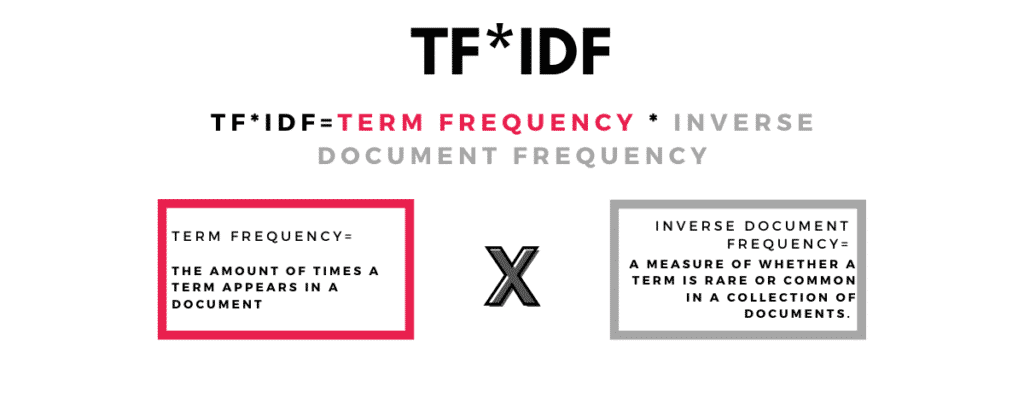


### Term Frequency (TF)


**Term Frequency (TF) :** Bir belgedeki kelime sıklığını ölçer. Bu büyük ölçüde kelimenin sıklığına ve belgenin uzunluğuna bağlıdır.

**Hesaplama :** Aranan t kelimesi d dokümanında kaç defa geçiyor ?


Her belge kendi terim sıklığına sahiptir. Dolayısıyla TF değeri her belge ve her kelime için kendine özgüdür.

* *Notasyondaki TF hesaplaması scikit-learn ile aynıdır.*


### Inverse Data Frequency (IDF)

**Inverse Data Frequency (IDF) :** Corpustaki tüm belgelerde yer alan nadir sözcüklerin ağırlığını belirler. Kısaca bir terimin ne kadar önemli olduğunun ölçüsüdür.

Notasyon **"doküman sayısı / kelimenin geçtiği doküman sayısı"** sonucunun log dönüşümünü verir. 

Scikit-Learn paket kodunda yer alan hesaplama standart notasyondan farklıdır. Aşağıdaki görselde her ikisi de yer almaktadır.

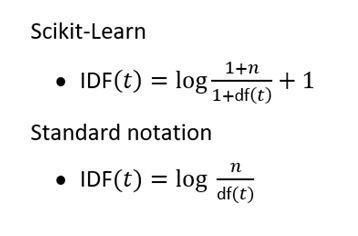



Scikit-Learn notasyonunda pay ve paydaya sıfır hatasını önelemek için fazladan 1 sabit sayısı eklenir. 


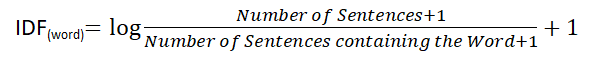

Tf büyük ölçüde kelimenin sıklığına ve belgenin uzunluğuna bağlıdır. Örneğin "ama" gibi kullanımı oldukça yaygın olan bir kelimenin bir dokümanda birden çok kez görülebilir. Örneğin biri 100, diğeri 1000 kelimelik iki belgemiz olduğunu varsayalım. "ama" gibi oldukça yaygın olarak kullanılan bir kelimenin 1000 kelimelik belgede daha sıklıkla yer alıyor olma olasılığı daha yüksektir. Peki bu bize daha uzun olan belgenin daha önemli olduğuna dair bir kanıt sunar mı? 

Bu temsilin ana sorunu, belirli bir kelimenin daha uzun belgelerde daha çok görünme olasılığı olduğundan tf değeri bu kelimeyi gerçekte olduğundan daha önemli hale getirecektir.Bu da uzun belgelere karşı bir önyargı yaratma problemini ortaya çıkaracaktır. Bu nedenle, bu sorunu çözme yaklaşımı,  **L2** veya **Öklid Normu** normalleştirmesidir. 

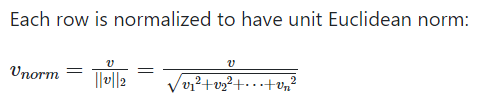

                                                    - Öklid normu

In [1]:
import pandas as pd
import numpy as np
import re
import requests
from bs4 import BeautifulSoup

import nltk
WPT = nltk.WordPunctTokenizer()

import spacy
from spacy.lang.tr import Turkish
nlp = Turkish()

### Beautifulsoup Vikipedi Parsing

In [2]:
def viki_intro(page_name):
    request = requests.get('https://tr.wikipedia.org/wiki/'+page_name).content
    if request is not None:
        soup = BeautifulSoup(request, 'html.parser')
        title = soup.select("#firstHeading")[0].text
        paragraphs = soup.select("p")
        intro = '\n'.join([ para.text for para in paragraphs[2:3]])
    return title, intro


In [3]:
page_list = ["Yerdeniz_Büyücüsü", "Mülksüzler"]

def viki_df(page_list):
    Title = []; Intro = []
    for i in page_list:
        title, intro = viki_intro(i)
        Title.append(title)
        Intro.append(intro)
        df = pd.DataFrame(list(zip(Title, Intro)), columns =["Title","Intro"])
    return df

df = viki_df(page_list)
df.head()

,Title,Intro
0,Yerdeniz Büyücüsü,Doğuştan üstün büyücülük yeteneklerine sahip G...
1,Mülksüzler,Konu 'Anarres' ve 'Urras' adlı bir ikili dünya...


### NLP Preprocessing

In [4]:
def cleaning_text(text):
    text_nopunct = re.sub(r'[^\w\s]','', str(text).lower())
    text_nonumbers =re.sub('[0-9]+', '', str(text_nopunct))
    return text_nonumbers

In [5]:
# func. definition for getting the root of the each normalized text
def lemma(Text):
    Lemma=[]
    doc= nlp(Text)
    for word in doc:
        Lemma.append(word.lemma_)
    return ' '.join(Lemma)

In [6]:
text_file = open("zemberek_stopwords.txt", "r")
stopwords_zemberek = text_file.read().split('\n')
len(stopwords_zemberek)

1797

In [7]:
def tokenize(text):
    tokens = WPT.tokenize(text)
    return tokens

In [8]:
df.loc[:,'Intro_Preprocessing'] = df.loc[:,'Intro'].apply(lambda x: cleaning_text(x))

In [9]:
df.loc[:,'Intro_Preprocessing'] = df.loc[:,'Intro_Preprocessing'].apply(lambda x: lemma(x))

In [10]:
df.loc[:,'Intro_Preprocessing'] = df.loc[:,'Intro_Preprocessing']\
    .apply(lambda x: " ".join(x for x in str(x).split() if x not in stopwords_zemberek))

In [11]:
df.loc[:,'Intro_token'] = df.loc[:,'Intro_Preprocessing'].apply(lambda x: tokenize(x) )

In [12]:
df

,Title,Intro,Intro_Preprocessing,Intro_token
0,Yerdeniz Büyücüsü,Doğuştan üstün büyücülük yeteneklerine sahip G...,doğuştan üstün büyücülük yetenek sahip ged kar...,"[doğuştan, üstün, büyücülük, yetenek, sahip, g..."
1,Mülksüzler,Konu 'Anarres' ve 'Urras' adlı bir ikili dünya...,konu anarres urras ad ikili dünya sistem geçer...,"[konu, anarres, urras, ad, ikili, dünya, siste..."


# TF-IDF  Scikit-Learn

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(df["Intro_Preprocessing"])
# summarize
print ('vocabulary: ',sorted(vectorizer.vocabulary_.items(), key=lambda kv: kv[1]))

vocabulary:  [('ad', 0), ('ada', 1), ('al', 2), ('alt', 3), ('amaç', 4), ('anarres', 5), ('anarreslinin', 6), ('anarşist', 7), ('baş', 8), ('büyü', 9), ('büyücülük', 10), ('davet', 11), ('devlet', 12), ('diyar', 13), ('doğuştan', 14), ('dünya', 15), ('düşman', 16), ('ejderha', 17), ('el', 18), ('et', 19), ('eğitim', 20), ('ged', 21), ('gedin', 22), ('geliş', 23), ('geçer', 24), ('geçir', 25), ('git', 26), ('gölge', 27), ('gönder', 28), ('hikâye', 29), ('ifşa', 30), ('ikili', 31), ('içdeniz', 32), ('kapitalist', 33), ('karakter', 34), ('karanlık', 35), ('kitap', 36), ('konu', 37), ('köy', 38), ('mücadele', 39), ('odocu', 40), ('oku', 41), ('okul', 42), ('ol', 43), ('olay', 44), ('oldukça', 45), ('ruh', 46), ('sahip', 47), ('saldırı', 48), ('shevek', 49), ('sis', 50), ('sistem', 51), ('sonuç', 52), ('süreç', 53), ('urras', 54), ('urrasa', 55), ('varlık', 56), ('yap', 57), ('yaşar', 58), ('yetenek', 59), ('çalış', 60), ('çağır', 61), ('çekiş', 62), ('ün', 63), ('üstün', 64)]


In [14]:
print('idfs: ', vectorizer.idf_ ,'\n')
# encode document
vector = vectorizer.transform(df["Intro_Preprocessing"])
# summarize encoded vector
print('vectors: ', vector.toarray())


idfs:  [1.40546511 1.40546511 1.40546511 1.40546511 1.40546511 1.40546511
 1.40546511 1.40546511 1.40546511 1.40546511 1.40546511 1.40546511
 1.40546511 1.40546511 1.40546511 1.40546511 1.40546511 1.40546511
 1.40546511 1.40546511 1.40546511 1.40546511 1.40546511 1.40546511
 1.40546511 1.40546511 1.40546511 1.40546511 1.40546511 1.40546511
 1.40546511 1.40546511 1.40546511 1.40546511 1.40546511 1.40546511
 1.40546511 1.         1.40546511 1.40546511 1.40546511 1.40546511
 1.40546511 1.40546511 1.40546511 1.40546511 1.40546511 1.40546511
 1.40546511 1.40546511 1.40546511 1.40546511 1.40546511 1.40546511
 1.40546511 1.40546511 1.40546511 1.40546511 1.40546511 1.40546511
 1.40546511 1.40546511 1.40546511 1.40546511 1.40546511] 

vectors:  [[0.         0.10127069 0.20254139 0.10127069 0.10127069 0.
  0.         0.         0.         0.20254139 0.30381208 0.10127069
  0.         0.20254139 0.10127069 0.         0.10127069 0.10127069
  0.10127069 0.10127069 0.10127069 0.10127069 0.10127069 0

### TF-IDF  from Scratch

In [15]:
#function was created to find the number of documents containing the word.
#for the denominator of the idf formula
def df_t(doc, word):
    return list(set(doc.split(" "))).count(word)

In [16]:
def tf_idf(docs, doc_index):
    tf = []
    idf = []
    #sci-kit learn tf idf does not count single characters
    unique_words =  [word for word in list(set(" ".join(docs).split(" "))) if len(word)>1]
    unique_words.sort()
    word_index =  dict(zip(unique_words, [i for i, j in enumerate(unique_words)]))

    word_count_d =  dict.fromkeys(unique_words, 0)  #number of documents containing the word
    for word in unique_words:   
        [word_count_d.update({word : word_count_d[word]+df_t(docs[i], word)}) for i in range(len(df))]
        tf.append(docs[doc_index].split(" ").count(word))   #word frequency (TF)
        idf.append(np.log((1+len(docs))/(1+word_count_d[word]))+1) # Number of doc / number of doc containing the word (IDF)

    tf_idf_raw = [tf[i] * idf[i] for i in range(len(tf))]     # tf * idf
    #Normalization by the Euclidean Norm
    tf_idf = (tf_idf_raw / np.sqrt(np.dot(tf_idf_raw, tf_idf_raw)))
    return idf, tf_idf, word_index

In [17]:
import scipy
for i in range(len(df)):
    idf, tfidf, word_index = tf_idf(df["Intro_Preprocessing"],i)
    tfidf =scipy.sparse.csr_matrix(list(tfidf))
    print("vector",tfidf.toarray() ,'\n')

print(word_index)


vector [[0.         0.10127069 0.20254139 0.10127069 0.10127069 0.
  0.         0.         0.         0.20254139 0.30381208 0.10127069
  0.         0.20254139 0.10127069 0.         0.10127069 0.10127069
  0.10127069 0.10127069 0.10127069 0.10127069 0.10127069 0.10127069
  0.         0.10127069 0.         0.30381208 0.10127069 0.
  0.10127069 0.         0.10127069 0.         0.10127069 0.30381208
  0.10127069 0.07205493 0.20254139 0.10127069 0.         0.10127069
  0.20254139 0.30381208 0.10127069 0.10127069 0.10127069 0.10127069
  0.10127069 0.         0.10127069 0.         0.10127069 0.10127069
  0.         0.         0.10127069 0.10127069 0.10127069 0.10127069
  0.10127069 0.20254139 0.10127069 0.10127069 0.10127069]] 

vector [[0.36819088 0.         0.         0.         0.         0.36819088
  0.18409544 0.18409544 0.18409544 0.         0.         0.
  0.18409544 0.         0.         0.36819088 0.         0.
  0.         0.         0.         0.         0.         0.
  0.18409544 

### Scikit-Learn Check

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(df["Intro_Preprocessing"])
vector = vectorizer.transform(df["Intro_Preprocessing"])

In [19]:
print('vectors: ', vector.toarray(),'\n')
print ('vocabulary: ',sorted(vectorizer.vocabulary_.items(), key=lambda kv: kv[1]))

vectors:  [[0.         0.10127069 0.20254139 0.10127069 0.10127069 0.
  0.         0.         0.         0.20254139 0.30381208 0.10127069
  0.         0.20254139 0.10127069 0.         0.10127069 0.10127069
  0.10127069 0.10127069 0.10127069 0.10127069 0.10127069 0.10127069
  0.         0.10127069 0.         0.30381208 0.10127069 0.
  0.10127069 0.         0.10127069 0.         0.10127069 0.30381208
  0.10127069 0.07205493 0.20254139 0.10127069 0.         0.10127069
  0.20254139 0.30381208 0.10127069 0.10127069 0.10127069 0.10127069
  0.10127069 0.         0.10127069 0.         0.10127069 0.10127069
  0.         0.         0.10127069 0.10127069 0.10127069 0.10127069
  0.10127069 0.20254139 0.10127069 0.10127069 0.10127069]
 [0.36819088 0.         0.         0.         0.         0.36819088
  0.18409544 0.18409544 0.18409544 0.         0.         0.
  0.18409544 0.         0.         0.36819088 0.         0.
  0.         0.         0.         0.         0.         0.
  0.18409544 0.     